In [ ]:
#data cleaning and preparation

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Cardiotocographic.csv')

# Display the first few rows of the dataset
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Impute or delete missing values
df = df.fillna(df.mean())  # Impute missing values with the mean (for numerical columns)


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [ ]:
# Drop rows with missing values
df = df.dropna()



In [ ]:
# Check data types
print(df.dtypes)

# Convert columns to appropriate data types if necessary
df['LB'] = pd.to_numeric(df['LB'], errors='coerce')  # Example for converting columns to numeric


LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [ ]:
# Function to detect outliers based on IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in the 'LB' column
outliers = detect_outliers(df, 'LB')
print(outliers)


              LB        AC        FM        UC        DL        DS        DP  \
134    52.000000  0.001590  0.000000  0.029851  0.000000  0.000000  0.000003   
411   214.000000  0.000000  0.000000  0.001595  0.001595  0.000000  0.000000   
610   214.000000  0.002469  0.002469  0.002469  0.000000  0.000004  0.000000   
612   214.000000  0.005181  0.012953  0.002591  0.000000  0.000000  0.000000   
785    52.000000  0.000834  0.013344  0.000000  0.000000  0.000000  0.000000   
1027   51.842487  0.009485  0.000000  0.005420  0.002710  0.000005  0.000000   
1103  214.000000  0.006972  0.000000  0.002960  0.000000  0.000000  0.000000   
1406  214.000000  0.005068  0.000000  0.001689  0.000000  0.000000  0.000000   
1504  214.000000  0.006189  0.000000  0.006189  0.000000  0.000000  0.000000   
1834   52.188547  0.000000  0.001043  0.003128  0.007299  0.000000  0.000000   

           ASTV      MSTV  ALTV  MLTV      Width  Tendency     NSP  
134   58.000000  0.500000   0.0   7.9   44.00000  

In [ ]:
# Statistical summary for numerical columns
summary = df.describe()

# Calculate IQR for each numerical column
IQR = df.quantile(0.75) - df.quantile(0.25)
print("Interquartile Range (IQR):\n", IQR)

# Display the summary
print(summary)


Interquartile Range (IQR):
 LB          14.000000
AC           0.005606
FM           0.002567
UC           0.004685
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64
                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002

In [ ]:
# For example, let's check if there are any extreme values for 'LB' (Baseline FHR)
print(df[df['LB'] > df['LB'].quantile(0.95)])


              LB        AC   FM        UC        DL   DS        DP  ASTV  \
10    151.000000  0.000000  0.0  0.000834  0.000834  0.0  0.000000  64.0   
11    150.000000  0.000000  0.0  0.001014  0.000983  0.0  0.000000  64.0   
49    158.000000  0.005004  0.0  0.007506  0.000834  0.0  0.000000  27.0   
51    156.000000  0.000000  0.0  0.012048  0.007530  0.0  0.000000  43.0   
52    156.000000  0.000000  0.0  0.011331  0.008499  0.0  0.001416  34.0   
...          ...       ...  ...       ...       ...  ...       ...   ...   
1103  214.000000  0.006972  0.0  0.002960  0.000000  0.0  0.000000  19.0   
1406  214.000000  0.005068  0.0  0.001689  0.000000  0.0  0.000000  46.0   
1504  214.000000  0.006189  0.0  0.006189  0.000000  0.0  0.000000  38.0   
1551  149.277818  0.000000  0.0  0.007797  0.000000  0.0  0.000000  59.0   
1757  160.000000  0.009868  0.0  0.008224  0.000000  0.0  0.000000  58.0   

      MSTV  ALTV  MLTV  Width  Tendency       NSP  
10     1.9   9.0  27.6  130.0  1.00

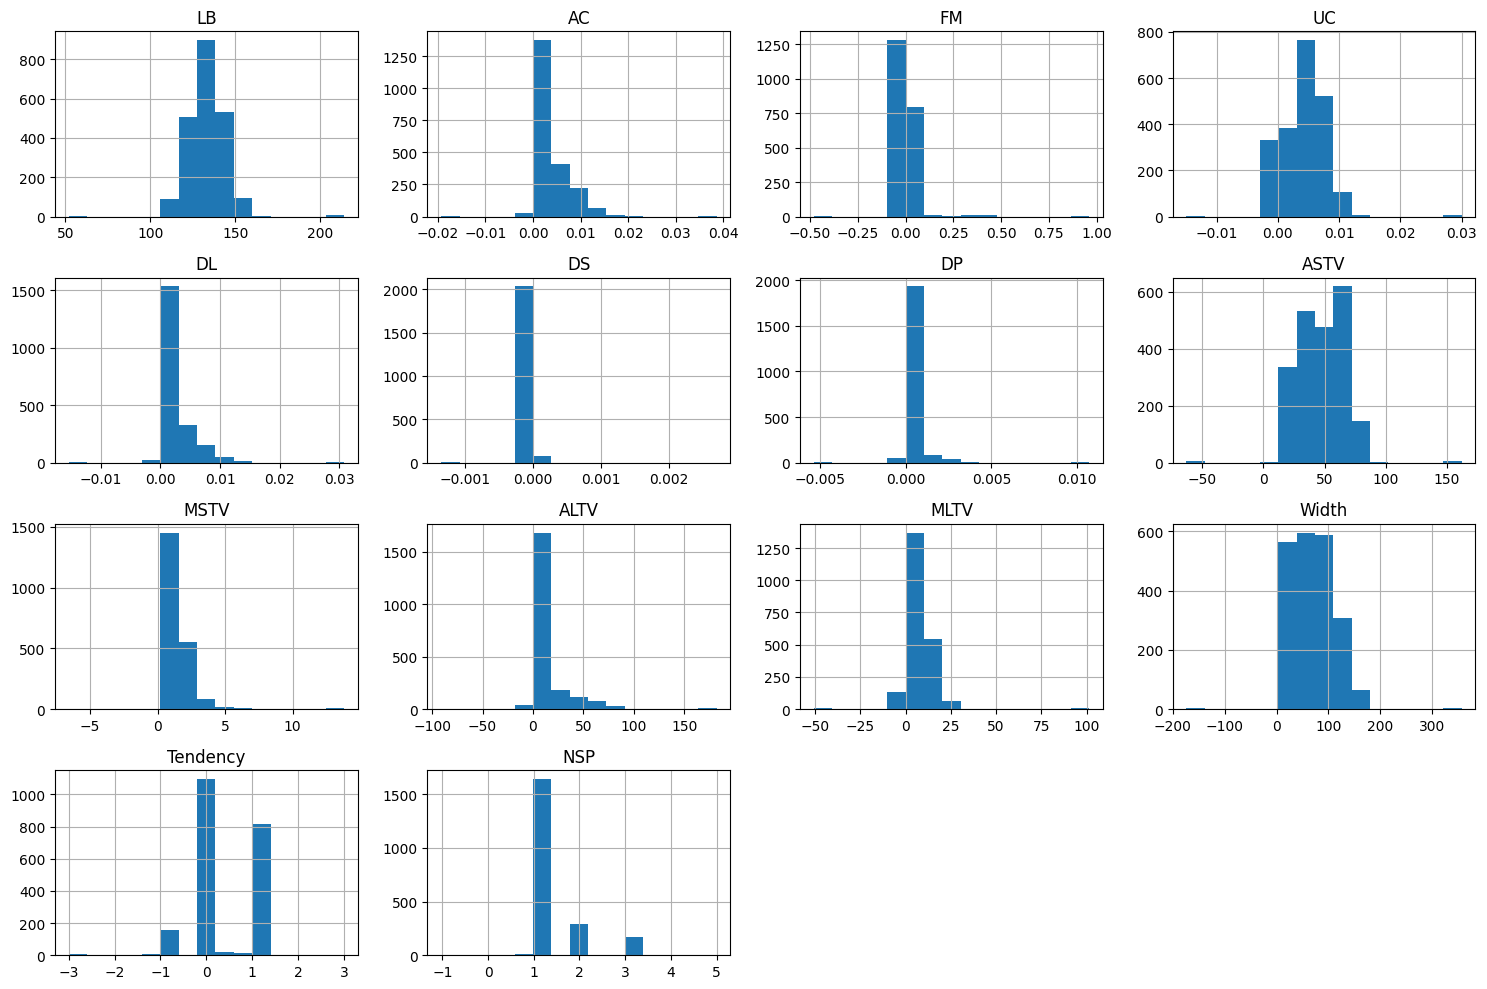

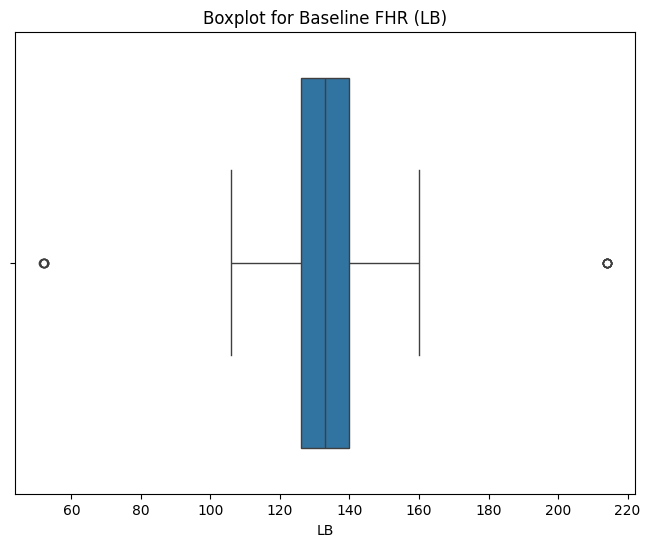

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical columns
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplot for a specific column (e.g., 'LB')
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['LB'])
plt.title("Boxplot for Baseline FHR (LB)")
plt.show()


In [ ]:
# Example: Checking correlation between 'LB' and 'AC'
corr_lb_ac = df['LB'].corr(df['AC'])
print(f"Correlation between LB and AC: {corr_lb_ac}")


Correlation between LB and AC: -0.06283900733826152
